In [2]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, fbeta_score
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier

In [3]:
#Load the dataset
df_churn = pd.read_csv("E:/Kaggle/Bank Churn/train.csv")

In [4]:
#Check the loaded dataset
df_churn.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [5]:
#Check the definition of the dataset
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  int64  
 11  IsActiveMember   165034 non-null  int64  
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 17.6+ MB


In [6]:
#Check the descriptive statistics
df_churn.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
# old_dataset = pd.read_csv('E:/Kaggle/Bank Churn/Churn_Modelling.csv')
# old_dataset.info()
# old_dataset.columns
# merged = pd.merge(df_churn,old_dataset,
#          on = ['CustomerId', 'Surname', 'CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary',],
#          how='left')
# merged.groupby(['Exited_x','Exited_y']).count()

### Data Cleaning

In [8]:
# def getFeats(df):
    
#     df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
#     df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
#     df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
#     df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')
#     df['Sur_Geo_Gend_Sal'] = df['Surname']+df['Geography']+df['Gender']+np.round(df.EstimatedSalary).astype('str')
    
#     return df

# scale_cols = ['Age','CreditScore', 'Balance','EstimatedSalary']
# ###
# for c in scale_cols:
#     min_value = df_churn[c].min()
#     max_value = df_churn[c].max()
#     df_churn[c+"_scaled"] = (df_churn[c] - min_value) / (max_value - min_value)

In [10]:
#change columns/features to lower case
df_churn.rename(columns={"CustomerId":"customer_id","CreditScore":"credit_score","Age":"age","Tenure":"tenure", "Balance":"balance",
                        "NumOfProducts":"no_of_products", "HasCrCard":"has_cr_card","IsActiveMember":"is_active_member",
                        "EstimatedSalary":"estimated_salary","Exited":"exited","Surname":"surname","Geography":"geo","Gender":"gender"}, inplace=True)
# old_dataset.rename(columns={"RowNumber":"row_number","CustomerId":"customer_id","CreditScore":"credit_score","Age":"age","Tenure":"tenure", "Balance":"balance",
#                         "NumOfProducts":"no_of_products", "HasCrCard":"has_cr_card","IsActiveMember":"is_active_member",
#                         "EstimatedSalary":"estimated_salary","Exited":"exited","Surname":"surname","Geography":"geo","Gender":"gender"}, inplace=True)

In [11]:
#id, customer_id and surname can be dropped.
# df_churn.drop(columns=['id','customer_id','surname'], axis=1, inplace=True)
df_churn.drop(columns=['id'], axis=1, inplace=True)

### Exploratory Data Analysis (EDA)

<Axes: >

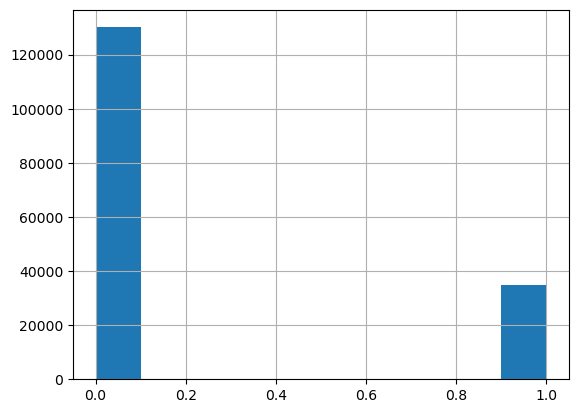

In [12]:
#Checking the imbalance
df_churn.exited.hist()

In [13]:
#Calculating the % of imbalance
imbalance = 100 * df_churn.exited.value_counts()[1]/ (df_churn.exited.value_counts()[1] + df_churn.exited.value_counts()[0])
print(f"Data Imbalance = {round(imbalance,2)}%")

Data Imbalance = 21.16%


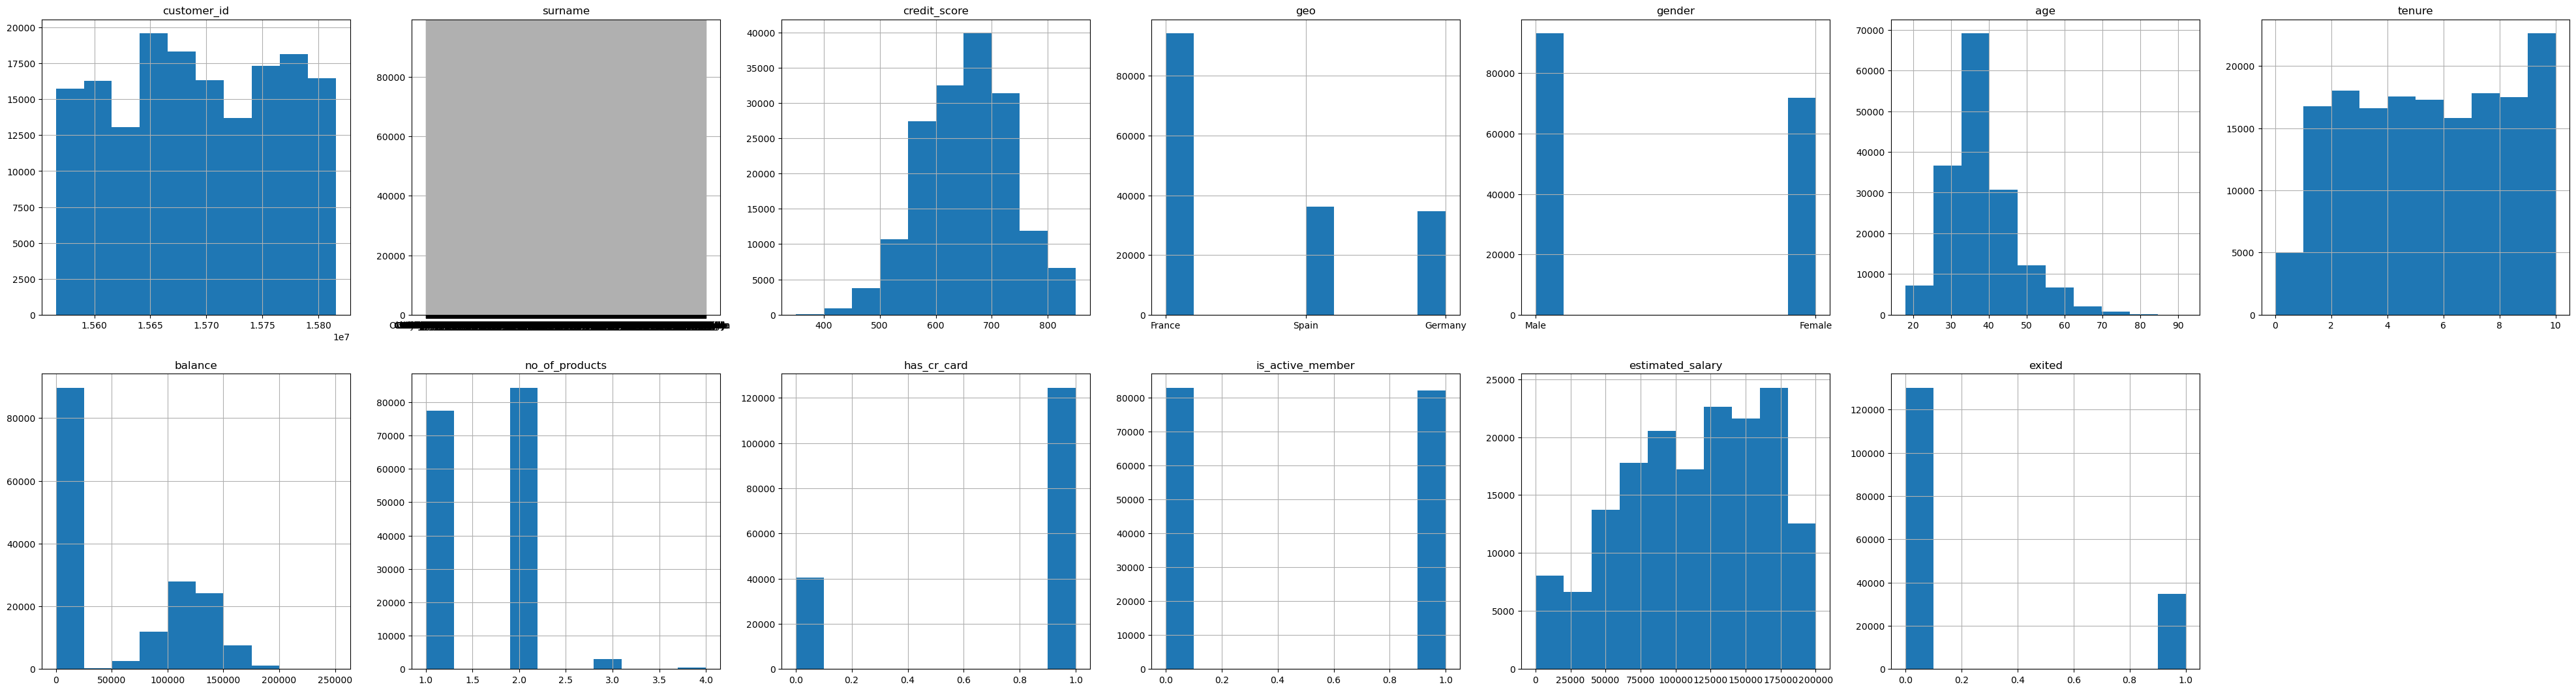

In [14]:
#Distriubution of the columns/features and target
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in df_churn.columns:
    plt.subplot(3,7,c)
    plt.title(f"{i}")
    df_churn[i].hist()
    c+=1
plt.show()

C:\Users\surya\AppData\Local\Temp\ipykernel_13160\2834953737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_churn.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, square=True, linewidths=.5)


<Axes: >

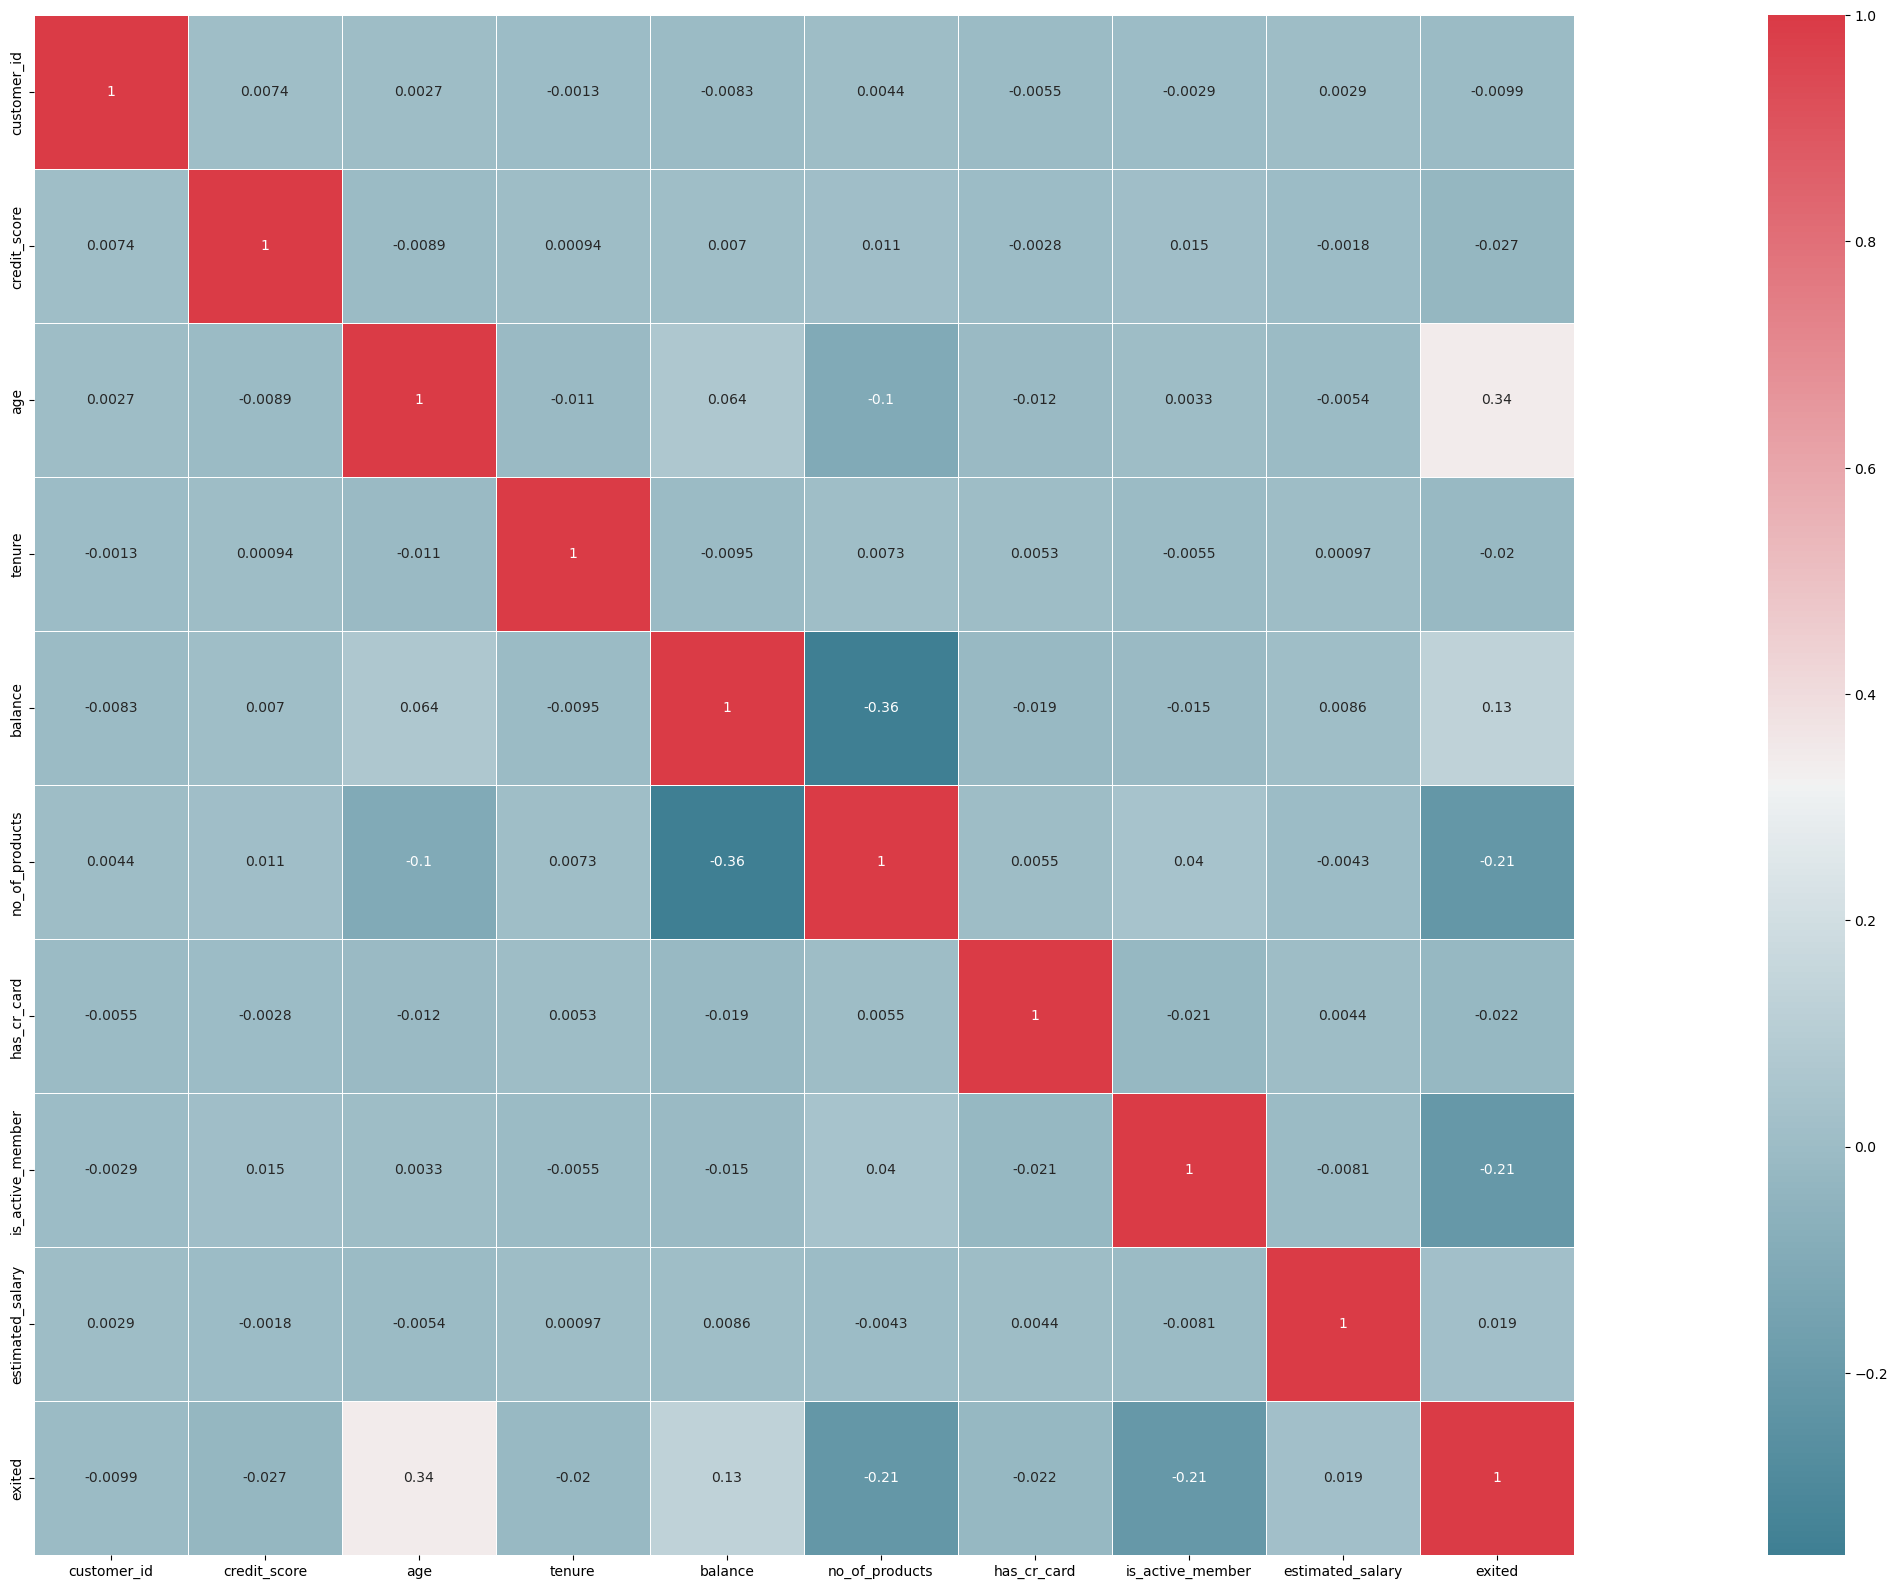

In [15]:
#checking the correlation heatmap to see linearity in data
sns.heatmap(df_churn.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, square=True, linewidths=.5)

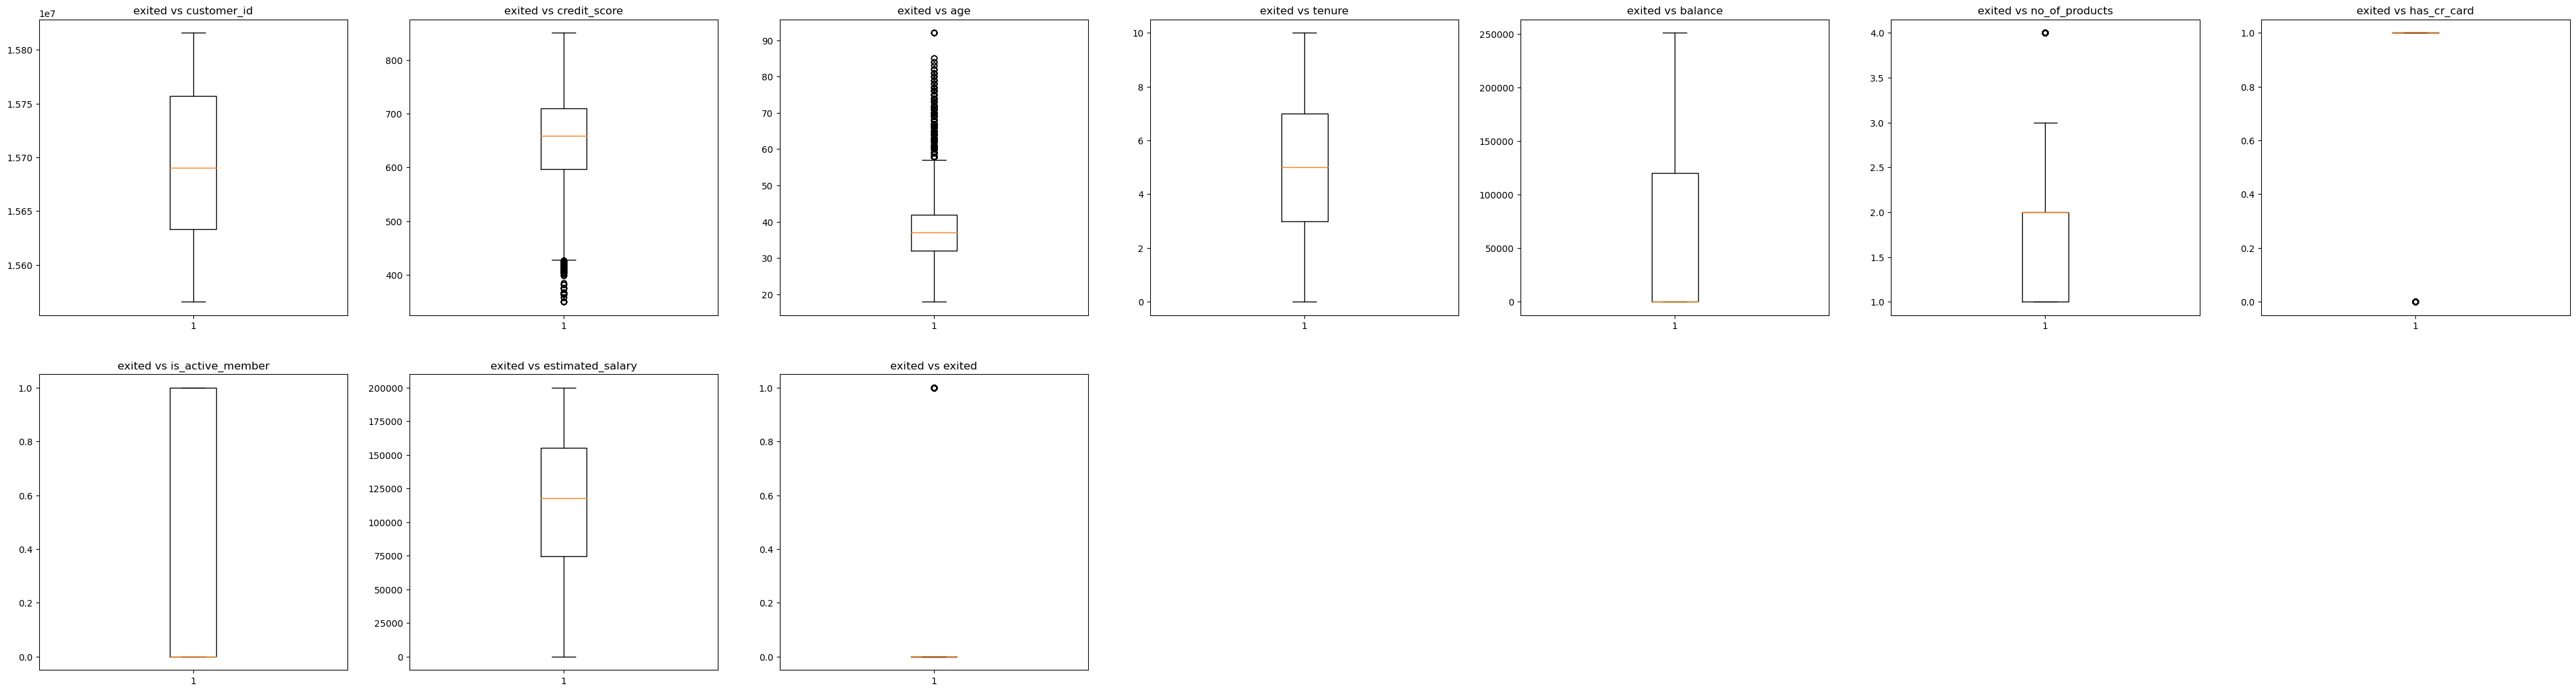

In [16]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in df_churn.columns:
    if(type(df_churn[i][0])==str):
        continue
    plt.subplot(3,7,c)
    plt.title(f"exited vs {i}")
    plt.boxplot(df_churn[i])
    c+=1
plt.show()

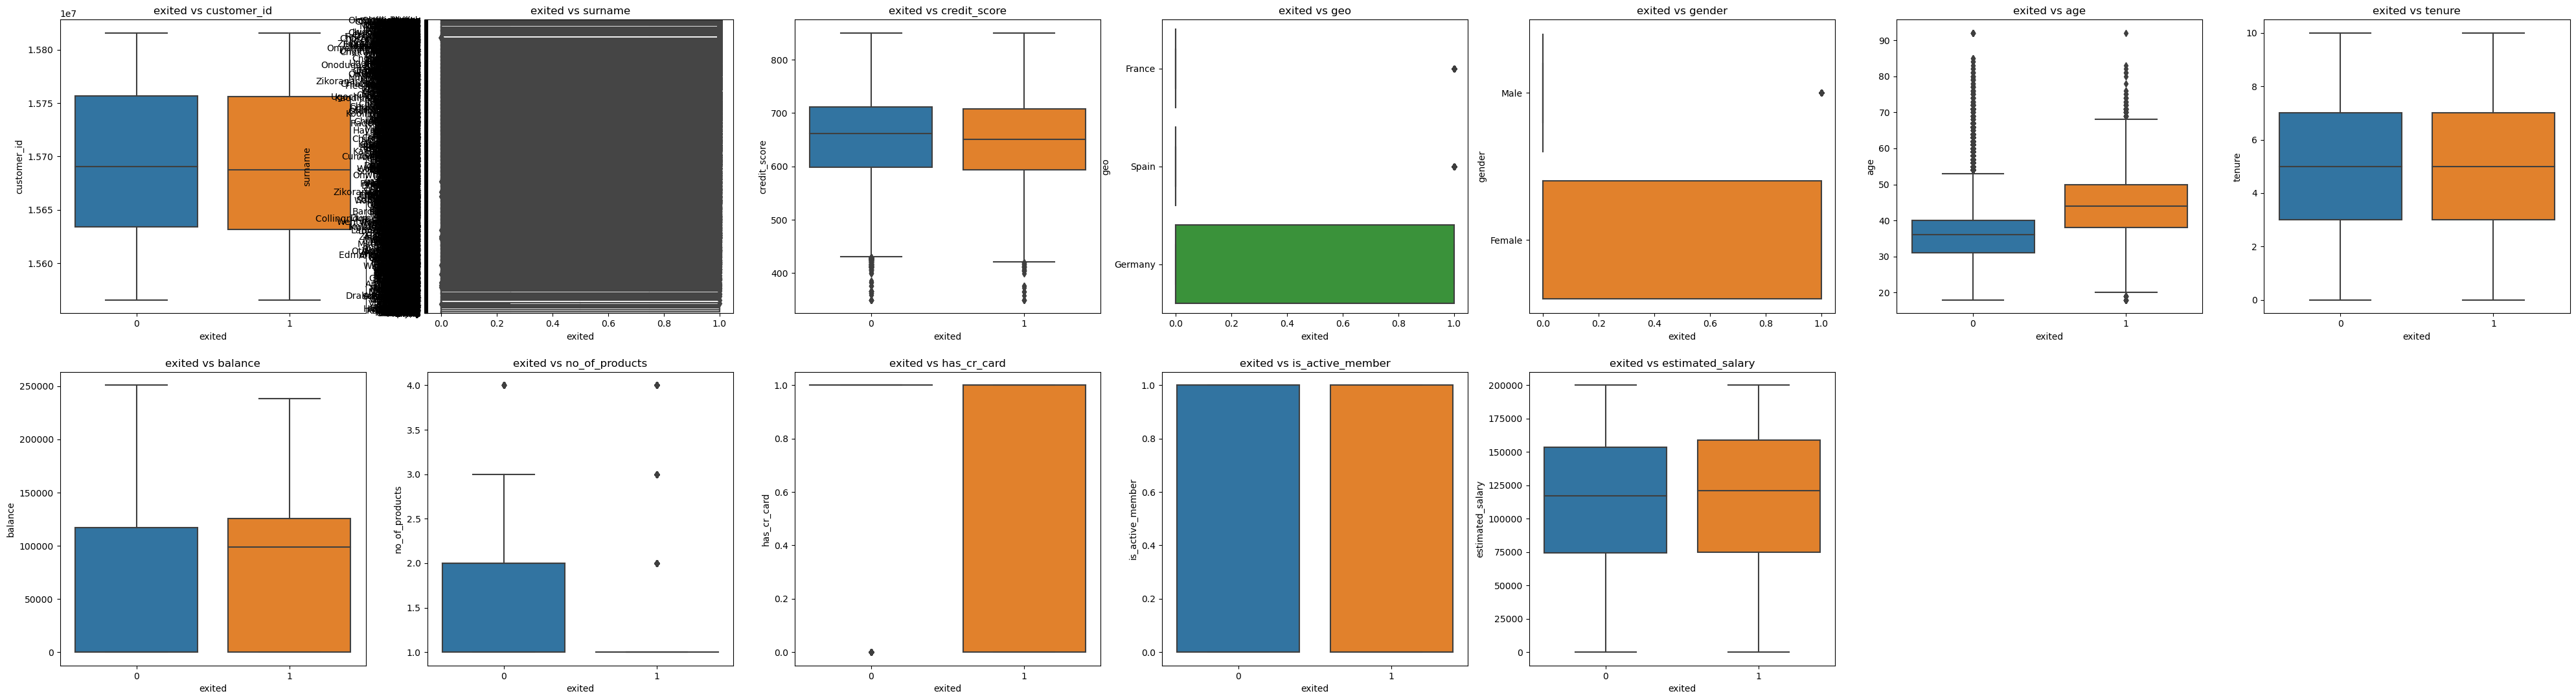

In [17]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in df_churn.columns:
    if(i=='exited'):
        continue
    plt.subplot(3,7,c)
    plt.title(f"exited vs {i}")
    sns.boxplot(data=df_churn, x='exited', y=i)
    c+=1
plt.show()

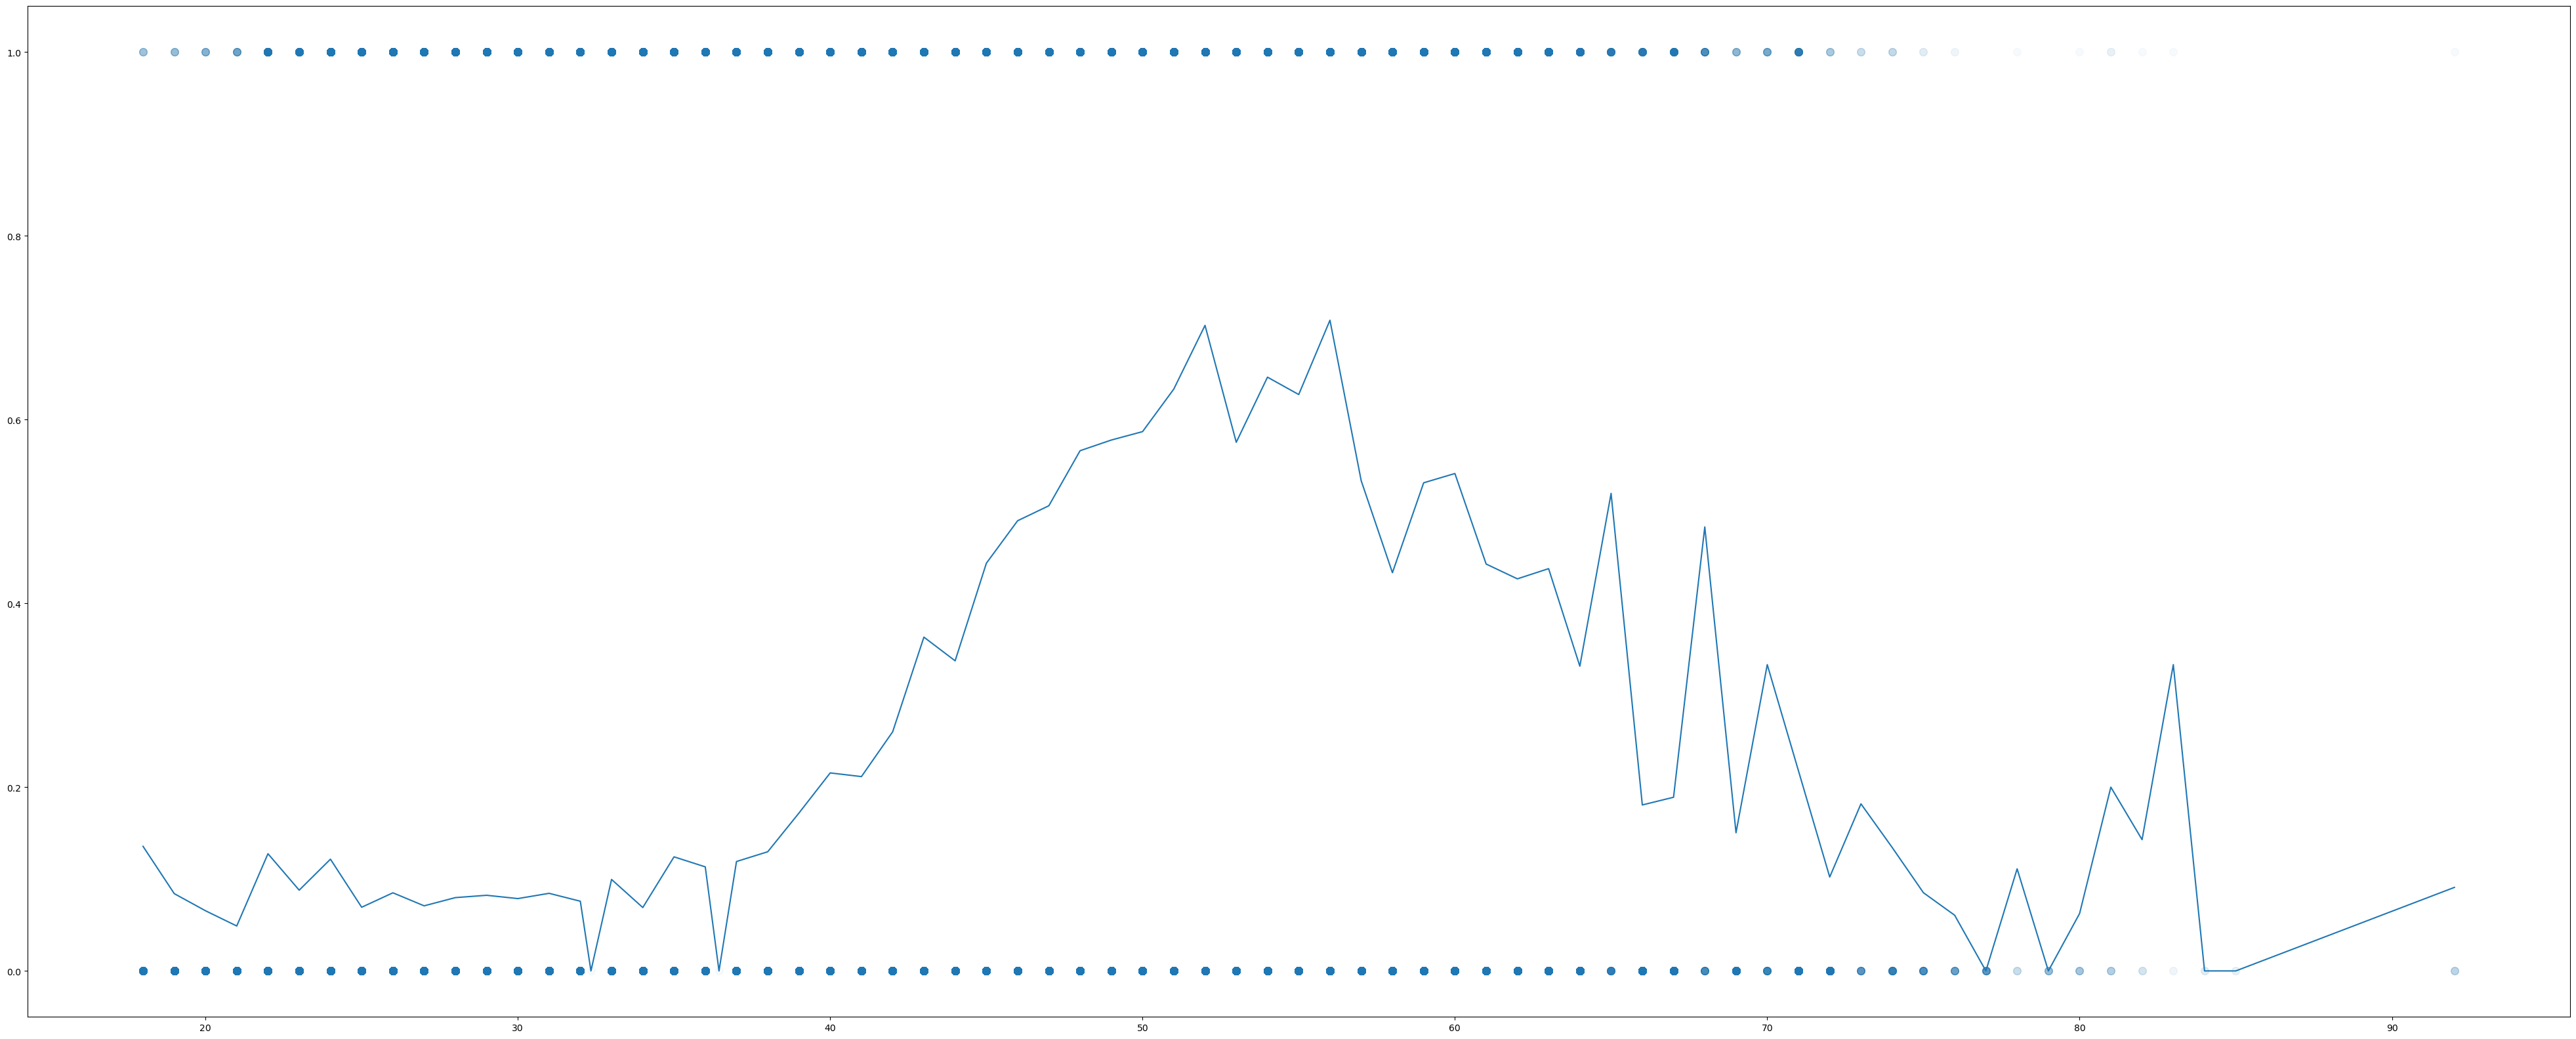

In [18]:
grouped = df_churn.groupby('age')['exited'].mean().reset_index()
plt.plot(grouped.age, grouped.exited)
plt.scatter(df_churn.age, df_churn.exited,s=70, alpha=0.03)

In [19]:
# Create a contingency table
contingency_table = pd.crosstab(df_churn['exited'],df_churn['geo'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 7358.673765244894
P-value: 0.0
Degrees of freedom: 2
Expected frequencies table:
[[74279.21697953 27283.41116376 28550.37185671]
 [19935.78302047  7322.58883624  7662.62814329]]


In [20]:
contingency_table

geo,France,Germany,Spain
exited,,,
0,78643,21492,29978
1,15572,13114,6235


In [21]:
# Create a contingency table
contingency_table = pd.crosstab(df_churn['gender'], df_churn['exited'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 3538.4525498496996
P-value: 0.0
Degrees of freedom: 1
Expected frequencies table:
[[56673.43027497 15210.56972503]
 [73439.56972503 19710.43027497]]


### Feature Engineering

In [22]:
def age_bins(data):
    bins = [18, 40, 60, 80, 100, float('inf')]
    labels = ['18-40', '41-60', '61-80', '81-100', '100+']

    # Create a new column with age groups
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
    return data


def feature_engineer(encoding,df, undersample=True, bin_age=False, target=True, surname=False):
    if(surname):
        label_encoder = preprocessing.LabelEncoder()
        df['surname']=label_encoder.fit_transform(df['surname'])
    if(encoding=='one_hot'):
        log_churn = pd.get_dummies(df)
    elif(encoding=='label_encoder'):
        label_encoder = preprocessing.LabelEncoder() 
        log_churn = df.copy()
        log_churn['gender']= label_encoder.fit_transform(log_churn.gender)
        log_churn['geo']= label_encoder.fit_transform(log_churn.geo) 
    if(bin_age==True):
        label_encoder = preprocessing.LabelEncoder() 
        log_churn = age_bins(log_churn)
        log_churn['age_group']= label_encoder.fit_transform(log_churn.age_group)
    if(target==True):
        X = log_churn.drop(columns=['exited'])
        y = log_churn.exited
    if(undersample==True):
        rus=RandomUnderSampler(random_state=0)
        X,y = rus.fit_resample(X,y)
    return X,y

## Modeling

In [23]:
def cross_val(classifier, num_splits=10):
    scores = cross_val_score(classifier,X,y,cv=num_splits, scoring='roc_auc')
    print("ROC_AUC Score:",np.round(scores, 2))
    print("Mean ROC_AUC:",scores.mean())

In [24]:
def model_test_train_evaluate(classifier):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    cross_val(classifier)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f2_score = fbeta_score(y_test, y_pred, beta=2)
    f3_score = fbeta_score(y_test, y_pred, beta=3)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print("Accuracy:",accuracy)
    print("f2_score:",f2_score)
    print("f3_score:",f3_score)
    print("Classification Report:")
    print(classification_rep)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
    fig, ax = plt.subplots(figsize=(6, 4))
    cm_display.plot(ax=ax)
    plt.show()

In [25]:
X, y = feature_engineer(encoding='one_hot',df=df_churn, undersample=False, bin_age=True, surname= True)

### 1. Baseline Modeling - Logistic Refression

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.61309e-20): result may not be accurate.
  warnings.warn(
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\surya\anaconda3\L

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.61435e-20): result may not be accurate.
  warnings.warn(
C:\Users\surya\anaconda3\L

ROC_AUC Score: [0.6  0.6  0.61 0.61 0.61 0.6  0.6  0.61 0.62 0.6 ]
Mean ROC_AUC: 0.6075587792035638
Accuracy: 0.7883904586859486
f2_score: 0.0
f3_score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     39035
           1       0.00      0.00      0.00     10476

    accuracy                           0.79     49511
   macro avg       0.39      0.50      0.44     49511
weighted avg       0.62      0.79      0.70     49511



C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


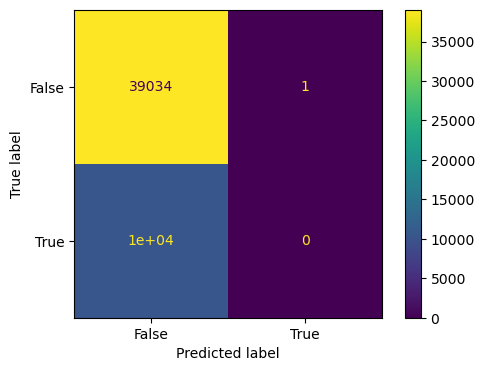

In [26]:
model_test_train_evaluate(
    LogisticRegression(
        solver='newton-cholesky'
    )
)

### 2. Decision Tree Classifier

ROC_AUC Score: [0.71 0.71 0.7  0.7  0.71 0.71 0.71 0.7  0.71 0.7 ]
Mean ROC_AUC: 0.7052462129015036
Accuracy: 0.799660681464725
f2_score: 0.5395717564056366
f3_score: 0.5413530973198741
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     39035
           1       0.53      0.54      0.53     10476

    accuracy                           0.80     49511
   macro avg       0.70      0.71      0.70     49511
weighted avg       0.80      0.80      0.80     49511



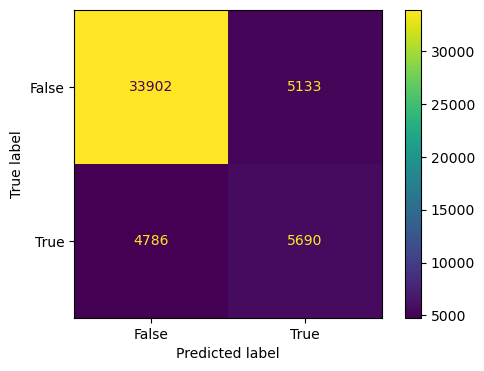

In [27]:
model_test_train_evaluate(
    DecisionTreeClassifier(random_state=2)
)

In [65]:
#Hyperparameter Tuning
clf = DecisionTreeClassifier(random_state=2)
def param_search(params,runs=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    grid_reg = RandomizedSearchCV(clf, params, n_iter=runs, scoring='roc_auc', cv=5, n_jobs=-1, random_state=12)
    grid_reg.fit(X_train, y_train)
    print(grid_reg.best_params_, grid_reg.best_score_)

    model = grid_reg.best_estimator_
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    # Display the results
    print("Classification Report:")
    print(classification_rep)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
# fig, ax = plt.subplots(figsize=(6, 4))
# cm_display.plot(ax=ax)
# plt.show()

param_search({'max_depth':[None,2,3,4,6,8,10,20]})    

{'max_depth': 6} 0.8783034938351619
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10477
           1       0.80      0.79      0.80     10476

    accuracy                           0.80     20953
   macro avg       0.80      0.80      0.80     20953
weighted avg       0.80      0.80      0.80     20953



ROC_AUC Score: [0.88 0.89 0.88 0.88 0.89 0.88 0.88 0.88 0.88 0.88]
Mean ROC_AUC: 0.8839466896356211
Accuracy: 0.8635252772111248
f2_score: 0.5808857527692338
f3_score: 0.5658862352261489
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39035
           1       0.74      0.55      0.63     10476

    accuracy                           0.86     49511
   macro avg       0.81      0.75      0.77     49511
weighted avg       0.86      0.86      0.86     49511



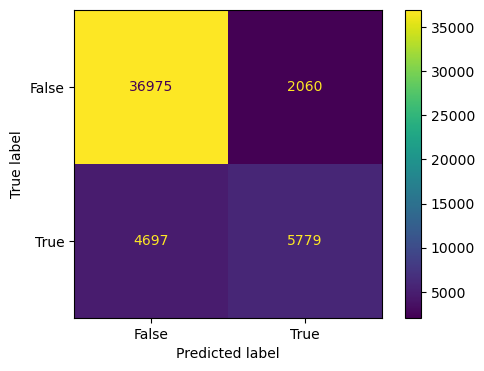

In [28]:
#checking Hyperparameter Tuning results using cross valudation
model_test_train_evaluate(
    DecisionTreeClassifier(random_state=3, max_depth=8)
)

In [29]:
print(X.columns)
DecisionTreeClassifier(random_state=3, max_depth=8).fit(X,y).feature_importances_

Index(['customer_id', 'surname', 'credit_score', 'age', 'tenure', 'balance',
       'no_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary',
       'geo_France', 'geo_Germany', 'geo_Spain', 'gender_Female',
       'gender_Male', 'age_group'],
      dtype='object')


array([2.06637093e-03, 2.89554136e-03, 3.65524832e-03, 4.09570453e-01,
       8.93748998e-04, 6.70133550e-02, 3.45646157e-01, 7.73033861e-04,
       1.03616646e-01, 2.67719106e-03, 0.00000000e+00, 3.37749372e-02,
       9.17431661e-05, 9.05985240e-03, 1.78881757e-02, 3.77545265e-04])

### 3. Random Forest Classifier

ROC_AUC Score: [0.88 0.88 0.87 0.87 0.88 0.87 0.88 0.88 0.87 0.87]
Mean ROC_AUC: 0.8750110281327522
Accuracy: 0.8600916967946517
f2_score: 0.559546696347263
f3_score: 0.5432486860847782
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     39035
           1       0.74      0.53      0.61     10476

    accuracy                           0.86     49511
   macro avg       0.81      0.74      0.76     49511
weighted avg       0.85      0.86      0.85     49511



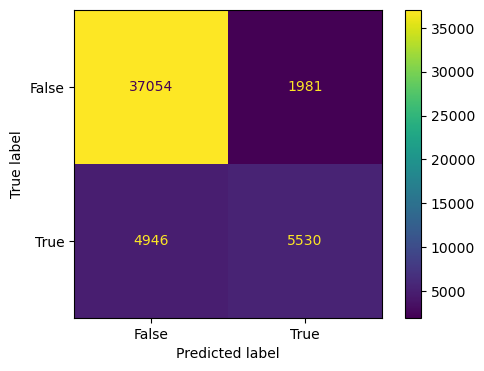

In [30]:
model_test_train_evaluate(
    RandomForestClassifier(random_state=3, n_jobs=-1, n_estimators=40, oob_score=True)
)

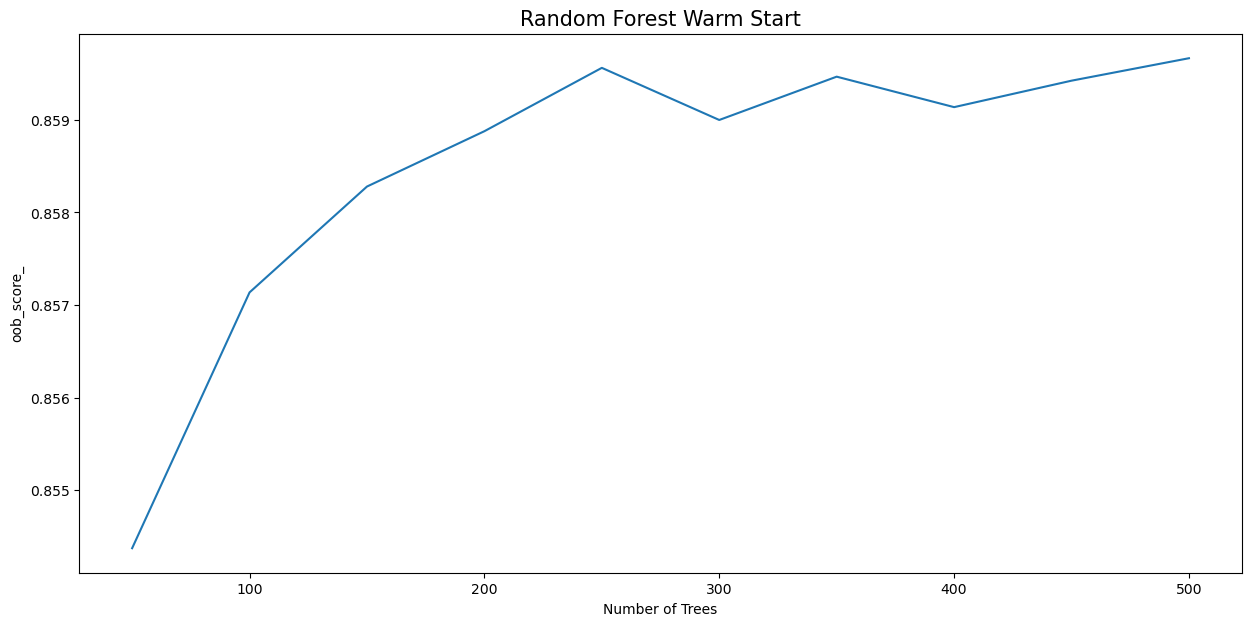

In [182]:
# #Tuning Model
# rf=RandomForestClassifier(random_state=3, n_jobs=-1, n_estimators=50, oob_score=True, warm_start=True)
# rf.fit(X_train,y_train)
# print(rf.oob_score_)
# oob_s=[rf.oob_score_]
# estimators=[50]
# est=50
# for i in range(9):
#     est+=50
#     rf.set_params(n_estimators=est)
#     rf.fit(X_train, y_train)
#     estimators.append(est)
#     oob_s.append(rf.oob_score_)

# plt.figure(figsize=(15,7))
# plt.plot(estimators, oob_s)
# plt.xlabel('Number of Trees')
# plt.ylabel('oob_score_')
# plt.title('Random Forest Warm Start', fontsize=15)
# plt.savefig('Random_Forest_Warm_Start', dpi=325)
# plt.show()

In [125]:
# #Hyperparameter tuning done
# def random_search(params, runs=14,  rf=RandomForestClassifier(random_state=5, n_jobs=-1) ):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#     rmv = RandomizedSearchCV(rf , params, n_iter=runs, n_jobs=-1, cv=5, scoring='roc_auc')
#     rmv.fit(X_train, y_train)
#     best_model = rmv.best_estimator_
#     best_params = rmv.best_params_
#     best_score = rmv.best_score_
#     print(best_params,best_score)
#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     classification_rep = classification_report(y_test, y_pred)
#     # Display the results
#     print("Classification Report:")
#     print(classification_rep)
# # random_search(params={'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],'max_depth':[None,2,4,6,8,10,20]})
# random_search(params={'max_features':[ 0.5, 0.4],'max_depth':[None,2,6,10], 'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2], 'min_samples_leaf': [1,2,4,6]})

{'min_samples_leaf': 6, 'min_impurity_decrease': 0.0, 'max_features': 0.5, 'max_depth': 6} 0.883598554432572
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10477
           1       0.80      0.80      0.80     10476

    accuracy                           0.80     20953
   macro avg       0.80      0.80      0.80     20953
weighted avg       0.80      0.80      0.80     20953



ROC_AUC Score: [0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
Mean ROC_AUC: 0.8885559051551238
Accuracy: 0.8652218698874997
f2_score: 0.5666849337311494
f3_score: 0.5493413609578056
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     39035
           1       0.76      0.53      0.63     10476

    accuracy                           0.87     49511
   macro avg       0.82      0.74      0.77     49511
weighted avg       0.86      0.87      0.86     49511



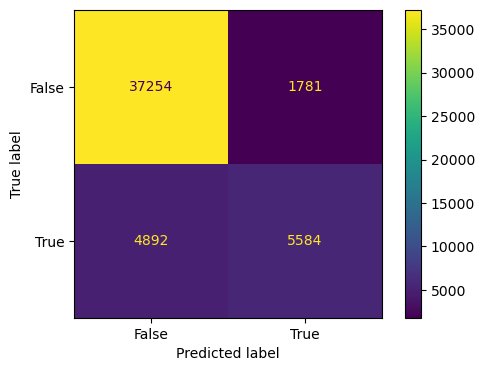

In [31]:
model_test_train_evaluate(
    RandomForestClassifier(min_samples_leaf= 4, max_features= 0.4, max_depth= 10, n_jobs=-1, oob_score=True, n_estimators=250)
)

### Model 3 - AdaBoost Classifier

In [37]:
#Hyperparameter tuning done
def adaboost_search(params, runs=14,  rf=AdaBoostClassifier(random_state=17) ):
    rmv = RandomizedSearchCV(rf , params, n_iter=runs, n_jobs=-1, cv=5, scoring='roc_auc')
    rmv.fit(X_train, y_train)
    best_model = rmv.best_estimator_
    best_params = rmv.best_params_
    best_score = rmv.best_score_
    print(best_params,best_score)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    # Display the results
    print("Classification Report:")
    print(classification_rep)
    
adaboost_search(params={'learning_rate':[0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0],
                        'n_estimators':[50,100,150,200,250,300]})
# random_search(params={'max_features':[ 0.5, 0.4],'max_depth':[None,2,6,10], 'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2], 'min_samples_leaf': [1,2,4,6]})

{'n_estimators': 300, 'learning_rate': 1.0} 0.8801912453140535
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10477
           1       0.80      0.80      0.80     10476

    accuracy                           0.80     20953
   macro avg       0.80      0.80      0.80     20953
weighted avg       0.80      0.80      0.80     20953



### Model 4 - GradientBoosting Classifier

In [124]:
# Hyparameter tuning
params={'subsample':[0.8, 0.9, 1],'n_estimators':[200, 300, 350],'learning_rate':[0.1,0.15, 0.2]}
gbm = GradientBoostingClassifier(max_depth=3, random_state=2)
rand_reg=RandomizedSearchCV(gbm, params, n_iter=10, scoring='roc_auc', cv=5, n_jobs=-1, random_state=2)
rand_reg.fit(X_train, y_train)
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
print("Best params:", best_params)
best_score = rand_reg.best_score_
print("Training score: {:.3f}".format(best_score))
y_pred = best_model.predict(X_test)
test_score = roc_auc_score(y_test, y_pred)
print('Test set score: {:.3f}'.format(test_score))

ROC_AUC Score: [0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
Mean ROC_AUC: 0.8888334925396864
Accuracy: 0.8032739941774447
f2_score: 0.8035237077193251
f3_score: 0.8035850641417227
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10477
           1       0.80      0.80      0.80     10476

    accuracy                           0.80     20953
   macro avg       0.80      0.80      0.80     20953
weighted avg       0.80      0.80      0.80     20953



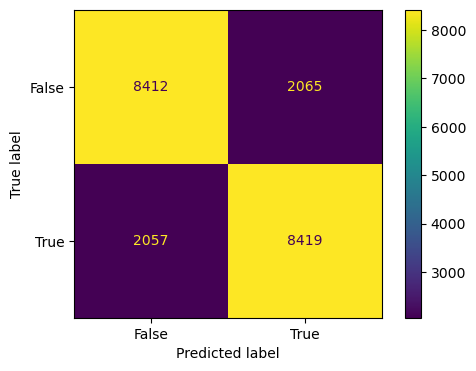

In [128]:
model_test_train_evaluate(
        GradientBoostingClassifier(n_estimators=200, max_depth = 3, learning_rate=0.1, subsample=0.8, random_state=2)
    )

### Model 5 - XGBoost Classifier

In [30]:
# X, y = feature_engineer(encoding='one_hot', undersample=True, df=df_churn, bin_age=True)

ROC_AUC Score: [0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
Mean ROC_AUC: 0.8886652156879119
Accuracy: 0.8053262062711783
f2_score: 0.8048314714026543
f3_score: 0.8047162155711488
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10477
           1       0.81      0.80      0.81     10476

    accuracy                           0.81     20953
   macro avg       0.81      0.81      0.81     20953
weighted avg       0.81      0.81      0.81     20953



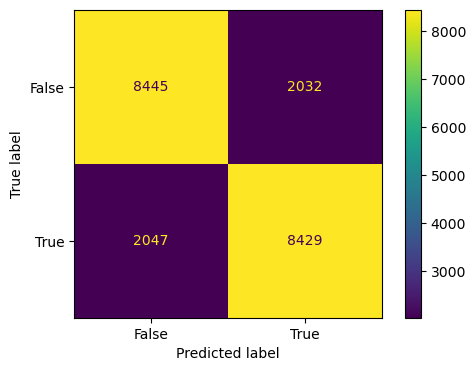

In [130]:
model_test_train_evaluate(
        XGBClassifier(n_estimators=200, max_depth = 3, eta=0.1, subsample=0.8, random_state=2)
    )

In [50]:
#Hyperparameter Tuning
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
def grid_search(params, random=False):
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1, scoring='roc_auc')
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='roc_auc')
    grid.fit(X, y)
    best_params = grid.best_params_
    print("Best params:", best_params)
    best_score = grid.best_score_
    print("Training score: {:.3f}".format(best_score))
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                    'gamma':[0, 0.1, 0.5, 1, 2, 5],
                    'max_depth':[1, 2, 3, 4, 5],
                    'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                    'n_estimators':[100,200,500,1000,1500]}, random=True)

Best params: {'subsample': 1, 'n_estimators': 1500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7, 'colsample_bynode': 0.7, 'colsample_bylevel': 0.8}
Training score: 0.893


ROC_AUC Score: [0.89 0.9  0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
Mean ROC_AUC: 0.8924938987146094
Accuracy: 0.8673224132011068
f2_score: 0.5840174267330926
f3_score: 0.5679734010729804
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39035
           1       0.75      0.55      0.64     10476

    accuracy                           0.87     49511
   macro avg       0.82      0.75      0.78     49511
weighted avg       0.86      0.87      0.86     49511



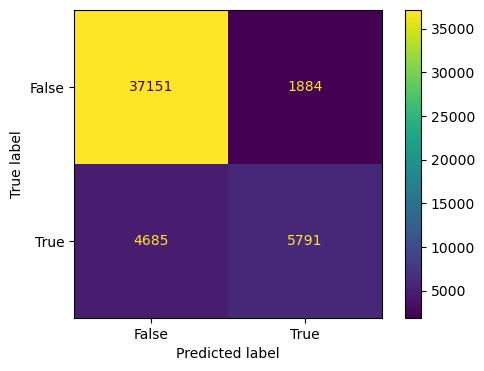

In [51]:
xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, subsample= 1, n_estimators= 1500, 
                    min_child_weight= 1, max_depth= 4, learning_rate= 0.05, gamma= 0.1, colsample_bytree= 0.7, colsample_bynode= 0.7, 
                    colsample_bylevel= 0.8)
model_test_train_evaluate(xgb)

## Final Submission

In [52]:
#Load the test dataset
final_model = xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
final_model.fit(X_train, y_train)

df_churn_test = pd.read_csv("E:/Kaggle/Bank Churn/test.csv")
id_test=df_churn_test['id']
df_churn_test.rename(columns={"CustomerId":"customer_id","CreditScore":"credit_score","Age":"age","Tenure":"tenure", "Balance":"balance",
                        "NumOfProducts":"no_of_products", "HasCrCard":"has_cr_card","IsActiveMember":"is_active_member",
                        "EstimatedSalary":"estimated_salary","Exited":"exited","Surname":"surname","Geography":"geo","Gender":"gender"}, inplace=True)
label_encoder = preprocessing.LabelEncoder()
df_churn_test['surname']=label_encoder.fit_transform(df_churn_test['surname']) 
df_churn_test = pd.get_dummies(df_churn_test.drop(columns=['id']))
df_churn_test = age_bins(df_churn_test)
df_churn_test['age_group']= label_encoder.fit_transform(df_churn_test.age_group)
# df_churn_test.drop(columns=['id','customer_id','surname'], inplace=True)
# df_churn_test['gender']= label_encoder.fit_transform(df_churn_test.gender)
# df_churn_test['geo']= label_encoder.fit_transform(df_churn_test.geo)

y_pred = final_model.predict_proba(df_churn_test)[:,1]
pd.DataFrame({'id':id_test,'Exited':y_pred} ).to_csv("E:/Kaggle/Bank Churn/submission.csv", index=False)